## Project 2
## INST 414
## Steven Ton

In [1]:
#import packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

(1a) Use the relplot function from seaborn, as we did in lectures for the speed of marathon runners, to plot the length of songs as a function of year. Horizontal axis is year, vertical axis is song length. Song length is measured as the number of words.

Now apply min-max scaling to song length to normalize it to the [0,1] interval.

array([[0.04864],
       [0.04704],
       [0.04704],
       ...,
       [0.04992],
       [0.0272 ],
       [0.01824]])

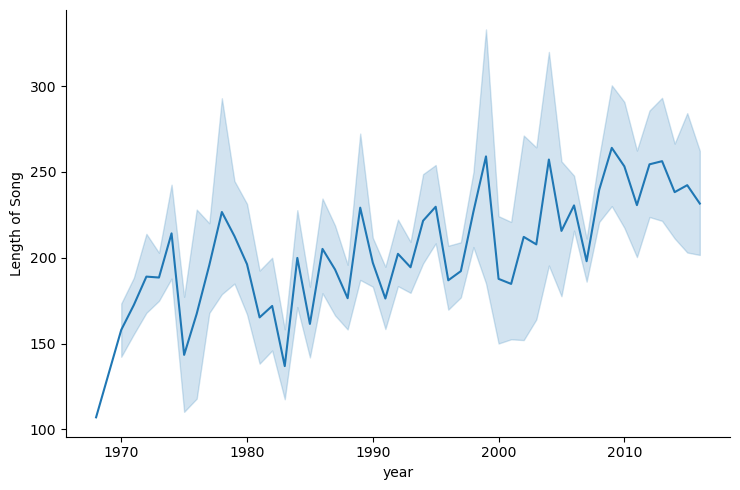

In [2]:
#Read csv file
music = pd.read_csv('dataset_31.csv')

#drop any null values in lyric column then counts number of words using a lambda function
#Add length of word column displaying the word count in each song
lyrics = music['lyrics']
lyrics = lyrics.dropna()
music["Length of Song"] = lyrics.apply(lambda n: len(n.split()))
music.head()


#Relplot the column by Year and Length of Song 
relplot = sns.relplot(data=music,x="year",y="Length of Song",kind="line",aspect=1.5)
relplot

#reshaped the song length column 
from sklearn.preprocessing import MinMaxScaler
songLength = music["Length of Song"]
songLength = songLength.dropna()
arr = songLength.values
reshape = arr.reshape(-1,1)
scaler=MinMaxScaler()
minmax=scaler.fit_transform(reshape)
minmax

(1b) Run simple linear regression on this dataset (x is year, y is the minmax-scaled version of song length). What is the coefficient for year?

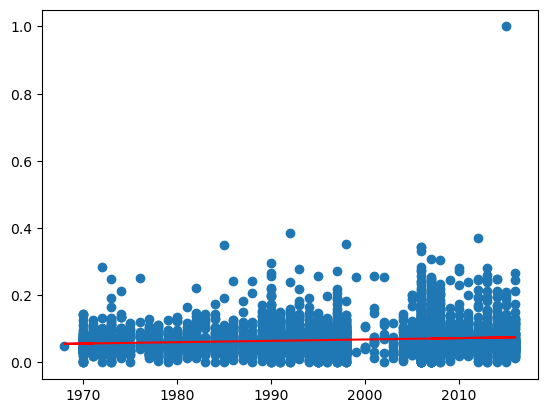

In [3]:
#https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
from sklearn import linear_model

#Reshape year column
year=music["year"].dropna()
arr2 = year.values
x = arr2.reshape(-1,1)
#Apply linear regression to the length of song column
songLengthModel=linear_model.LinearRegression()
songLengthModel.fit(x,minmax)
y_predict=songLengthModel.predict(x)
plt.scatter(x,minmax)
plt.plot(x,y_predict,c="red")
plt.show()


(2a) and (2b) repeat the same steps but instead of total word count of songs, use the number of unique words.

In [4]:
#https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html
from sklearn.feature_extraction.text import CountVectorizer

#Count number of unique words
music['Unique Words'] = lyrics.apply(lambda m: len(set(m.split(' '))))

#Relplot the column by Year and Unique Words
relplot2 = sns.relplot(data=music,x="year",y="Unique Words",kind="line")
relplot2

#reshaped Unique Words column 
from sklearn.preprocessing import MinMaxScaler
uniqueWords = music["Unique Words"]
uniqueWords = uniqueWords.dropna()
arr = uniqueWords.values
reshape = arr.reshape(-1,1)
scaler=MinMaxScaler()
minmax2=scaler.fit_transform(reshape)
minmax2

array([[0.06196944],
       [0.04329372],
       [0.07385399],
       ...,
       [0.06706282],
       [0.05093379],
       [0.0237691 ]])

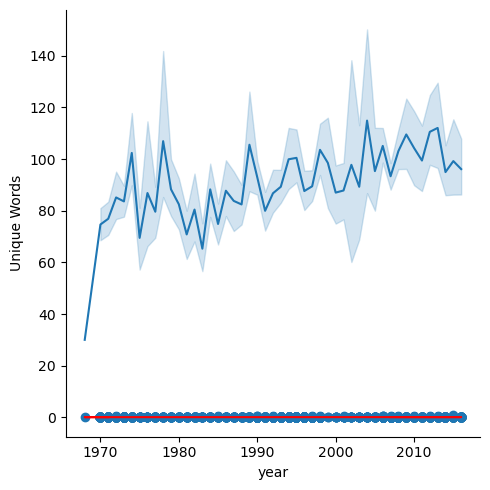

In [5]:
#(2b)

#https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
from sklearn import linear_model

#Apply linear regression to the unique word column
uniqueWordModel=linear_model.LinearRegression()
uniqueWordModel.fit(x,minmax2)
y_predict2=uniqueWordModel.predict(x)
plt.scatter(x,minmax2)
plt.plot(x,y_predict2,c="red")
plt.show()

(3a) and (3b) repeat the same steps as above but instead of number of words or number of unique words, let’s define a new measure: ratio of number of unique words to the total number of words: #unique_words/#words

In [6]:
#Adds a column for the ratio of unique words to length of song(total words)
music['ratio'] = music['Unique Words']/music['Length of Song']

#Replot the ratio of unique words to length of song(total words)
relplot = sns.relplot(data=music,x="year",y="ratio",kind="line",aspect=1.5)
relplot

#reshaped the ratio column
from sklearn.preprocessing import MinMaxScaler
ratio = music['ratio']
ratio = ratio.dropna()
arr4 = ratio.values
reshape = arr4.reshape(-1,1)
scaler=MinMaxScaler()
minmax3=scaler.fit_transform(reshape)
minmax3

array([[0.44307446],
       [0.30036587],
       [0.56272867],
       ...,
       [0.47100381],
       [0.68645273],
       [0.46069869]])

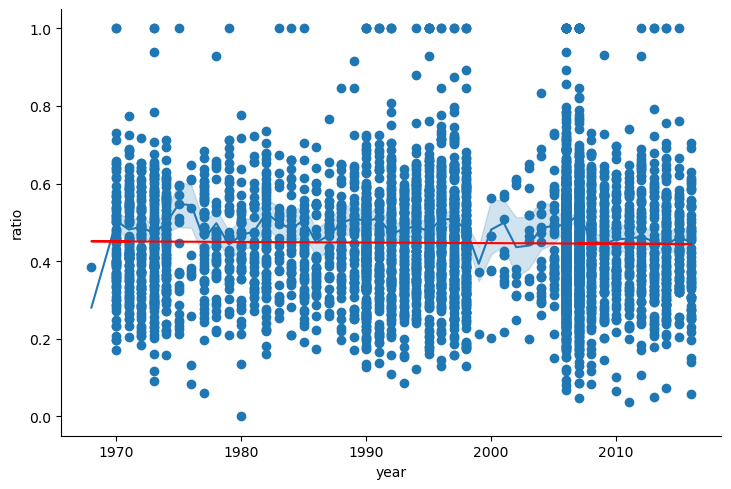

In [7]:
#(3b)

#https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
from sklearn import linear_model

#Apply linear regression to the ratio column
ratioModel=linear_model.LinearRegression()
ratioModel.fit(x,minmax3)
y_predict3=ratioModel.predict(x)
plt.scatter(x,minmax3)
plt.plot(x,y_predict3,c="red")
plt.show()